In [1]:
# getting video path
current = %pwd
from pathlib import Path
path = Path(current)
filename = str(path.parent.absolute())
video_name = "Binging with Babish_ Patrick's Briefcase from SpongeBob SquarePants.mp4"
filename += '\\' + video_name
filename


"c:\\Users\\brian\\Desktop\\PYUM\\P-YUM\\Binging with Babish_ Patrick's Briefcase from SpongeBob SquarePants.mp4"

In [2]:
import cv2

# finds the length of video in seconds
def find_video_length(filename):

    video = cv2.VideoCapture(filename)

    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)

    return frame_count / fps

vid_length = find_video_length(filename)
vid_length


313.06275

In [3]:
# pip install scenedetect[opencv] --upgrade
from scenedetect import detect, ContentDetector

# ContentDetector: performs content-aware scene detection on a video
# returns a list of the start/end times of "scenes". 
scene_list = detect(filename, ContentDetector())


In [4]:
import datetime
import time

cuts_in_seconds = []

for scene in scene_list:
    # print(str(scene[0])[:-4])
    x = time.strptime(str(scene[0])[:-4],'%H:%M:%S')
    cuts_in_seconds.append(datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())

(cuts_in_seconds)

[0.0,
 8.0,
 11.0,
 13.0,
 15.0,
 52.0,
 54.0,
 56.0,
 57.0,
 57.0,
 58.0,
 59.0,
 59.0,
 66.0,
 68.0,
 93.0,
 95.0,
 106.0,
 109.0,
 113.0,
 116.0,
 118.0,
 119.0,
 119.0,
 125.0,
 127.0,
 129.0,
 131.0,
 132.0,
 133.0,
 139.0,
 139.0,
 141.0,
 142.0,
 145.0,
 146.0,
 148.0,
 149.0,
 152.0,
 155.0,
 156.0,
 157.0,
 158.0,
 166.0,
 167.0,
 168.0,
 169.0,
 171.0,
 173.0,
 175.0,
 176.0,
 176.0,
 177.0,
 178.0,
 178.0,
 181.0,
 184.0,
 186.0,
 191.0,
 193.0,
 195.0,
 196.0,
 198.0,
 200.0,
 202.0,
 205.0,
 206.0,
 208.0,
 209.0,
 210.0,
 211.0,
 211.0,
 213.0,
 215.0,
 218.0,
 219.0,
 221.0,
 221.0,
 222.0,
 223.0,
 224.0,
 224.0,
 225.0,
 226.0,
 226.0,
 227.0,
 228.0,
 229.0,
 229.0,
 230.0,
 234.0,
 235.0,
 236.0,
 239.0,
 241.0,
 257.0,
 260.0,
 264.0,
 274.0,
 279.0,
 283.0]

In [5]:
# number of cuts
print(len(scene_list))

# cuts per second
print(f'There are {len(scene_list) / vid_length} cuts per second')

101
There are 0.3226190276549989 cuts per second


In [6]:
def cluster_by_seconds(cuts_in_seconds, cluster_time):
    time_segments = int(cuts_in_seconds[-1] // cluster_time + 1)
    cluster_array = [0] * time_segments
    print(time_segments)
    for time in cuts_in_seconds:
        cluster_array[int(time // cluster_time)] += 1
    return cluster_array



29


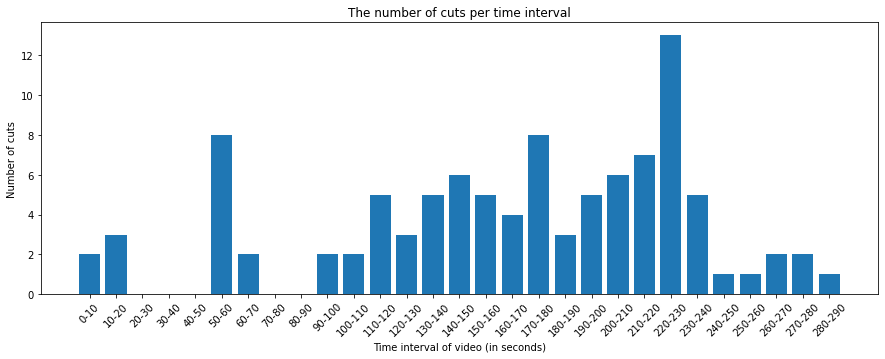

In [19]:
import matplotlib.pyplot as plt

cluster_time = 10
ten_sec_cluster = cluster_by_seconds(cuts_in_seconds, cluster_time)

time_intervals = []
for i in range(len(ten_sec_cluster)):
    time_intervals.append(f"{i * cluster_time}-{i * cluster_time + cluster_time}")
  
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.ylabel("Number of cuts")
plt.xlabel("Time interval of video (in seconds)")
plt.title("The number of cuts per time interval")
plt.xticks(rotation = 30)


plt.bar(time_intervals, ten_sec_cluster)
plt.show()

29


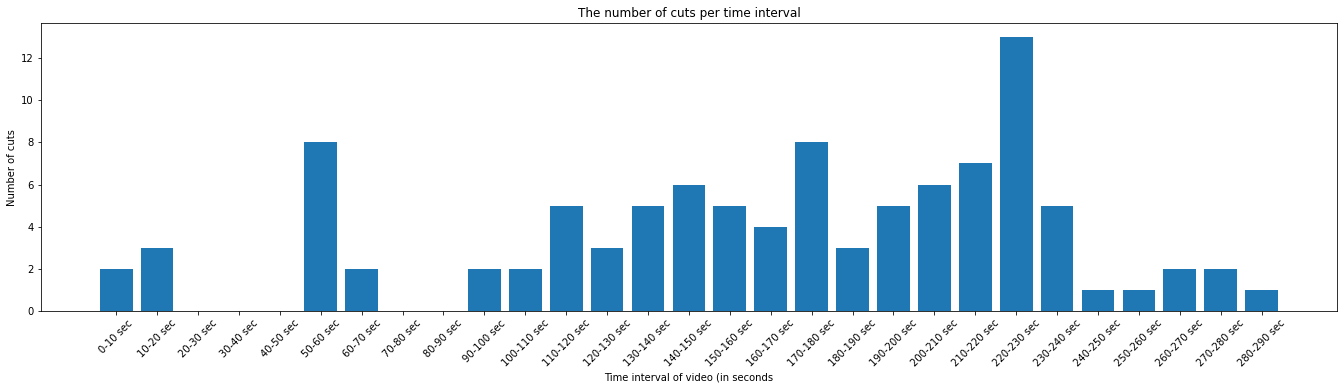

In [11]:
import matplotlib.pyplot as plt

cluster_time = 10
ten_sec_cluster = cluster_by_seconds(cuts_in_seconds, cluster_time)

fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
time_intervals = []
for i in range(len(ten_sec_cluster)):
    time_intervals.append(f"{i * cluster_time}-{i * cluster_time + cluster_time} sec")
ax.bar(time_intervals,ten_sec_cluster)
ax.tick_params(axis='x', labelrotation = 45)

plt.ylabel("Number of cuts")
plt.xlabel("Time interval of video (in seconds")
plt.title("The number of cuts per time interval")

plt.show()